In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [3]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [6]:
corpus_filename = '../data/testEmojis.txt'


In [7]:
corpus = open(corpus_filename).read().splitlines()


In [8]:
corpus

['😎 😎',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳 😢 🙁 🤔',
 '😘 😍 ❤️',
 '😳

In [9]:
def tokenize_corpus(corpus):
    tokens = [x.split() for x in corpus]
    return tokens

In [10]:
def onlyEmojiSequences(tokens):
    threshold_emojis = [x for x in tokens if len(x) > 0]
    return threshold_emojis

In [11]:
tokenized_corpus = tokenize_corpus(corpus)
emojiSequences = onlyEmojiSequences(tokenized_corpus)

In [12]:
emojiSequences

[['😎', '😎'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔'],
 ['😘', '😍', '❤️'],
 ['😳', '😢', '🙁', '🤔']

In [13]:
token_count = sum([len(sentence) for sentence in emojiSequences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 292,322 tokens


# training the model

In [14]:
# Dimensionality of the resulting word vectors.
num_features = 300

# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
seed = 1

# think of how to set those variables so that variables from different tweets are not learned from together!


In [15]:
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [16]:
thrones2vec.build_vocab(emojiSequences)

2019-01-08 21:46:25,278 : INFO : collecting all words and their counts
2019-01-08 21:46:25,279 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-01-08 21:46:25,285 : INFO : PROGRESS: at sentence #10000, processed 34999 words, keeping 8 word types
2019-01-08 21:46:25,292 : INFO : PROGRESS: at sentence #20000, processed 69999 words, keeping 8 word types
2019-01-08 21:46:25,299 : INFO : PROGRESS: at sentence #30000, processed 104999 words, keeping 8 word types
2019-01-08 21:46:25,306 : INFO : PROGRESS: at sentence #40000, processed 139999 words, keeping 8 word types
2019-01-08 21:46:25,312 : INFO : PROGRESS: at sentence #50000, processed 174999 words, keeping 8 word types
2019-01-08 21:46:25,319 : INFO : PROGRESS: at sentence #60000, processed 209999 words, keeping 8 word types
2019-01-08 21:46:25,326 : INFO : PROGRESS: at sentence #70000, processed 244999 words, keeping 8 word types
2019-01-08 21:46:25,332 : INFO : PROGRESS: at sentence #80000, processed 279

In [17]:
print("Word2Vec vocabulary length:", len(thrones2vec.wv.vocab))


Word2Vec vocabulary length: 7


In [18]:
thrones2vec.wv.vocab

{'😳': <gensim.models.keyedvectors.Vocab at 0x1a1b394908>,
 '😢': <gensim.models.keyedvectors.Vocab at 0x1a1b9eae10>,
 '🙁': <gensim.models.keyedvectors.Vocab at 0x1a1b9ea9e8>,
 '🤔': <gensim.models.keyedvectors.Vocab at 0x1a1b9ea320>,
 '😘': <gensim.models.keyedvectors.Vocab at 0x1a1b9eabe0>,
 '😍': <gensim.models.keyedvectors.Vocab at 0x1a1b9ea860>,
 '❤️': <gensim.models.keyedvectors.Vocab at 0x1a1b9ea4a8>}

In [19]:
thrones2vec.train(emojiSequences, total_examples=thrones2vec.corpus_count, epochs = 1000)


2019-01-08 21:47:09,678 : INFO : training model with 8 workers on 7 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2019-01-08 21:47:09,765 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-01-08 21:47:09,768 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-01-08 21:47:09,769 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-01-08 21:47:09,772 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-01-08 21:47:09,773 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-01-08 21:47:09,773 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-01-08 21:47:09,774 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-01-08 21:47:09,774 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-01-08 21:47:09,775 : INFO : EPOCH - 1 : training on 292322 raw words (26349 effective words) took 0.1s, 302944 effective 

(26507976, 292322000)

In [20]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [22]:
thrones2vec.save(os.path.join("trained", "testEmoji.w2v"))

2019-01-08 21:50:41,962 : INFO : saving Word2Vec object under trained/testEmoji.w2v, separately None
2019-01-08 21:50:41,963 : INFO : not storing attribute vectors_norm
2019-01-08 21:50:41,964 : INFO : not storing attribute cum_table
2019-01-08 21:50:41,966 : INFO : saved trained/testEmoji.w2v


# explore the trained model

In [25]:
thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "testEmoji.w2v"))

2019-01-08 21:50:54,401 : INFO : loading Word2Vec object from trained/testEmoji.w2v
2019-01-08 21:50:54,402 : INFO : loading wv recursively from trained/testEmoji.w2v.wv.* with mmap=None
2019-01-08 21:50:54,403 : INFO : setting ignored attribute vectors_norm to None
2019-01-08 21:50:54,403 : INFO : loading vocabulary recursively from trained/testEmoji.w2v.vocabulary.* with mmap=None
2019-01-08 21:50:54,403 : INFO : loading trainables recursively from trained/testEmoji.w2v.trainables.* with mmap=None
2019-01-08 21:50:54,404 : INFO : setting ignored attribute cum_table to None
2019-01-08 21:50:54,404 : INFO : loaded trained/testEmoji.w2v


In [26]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [27]:
all_word_vectors_matrix = thrones2vec.wv.vectors

In [28]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [29]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [30]:
sns.set_context("poster")

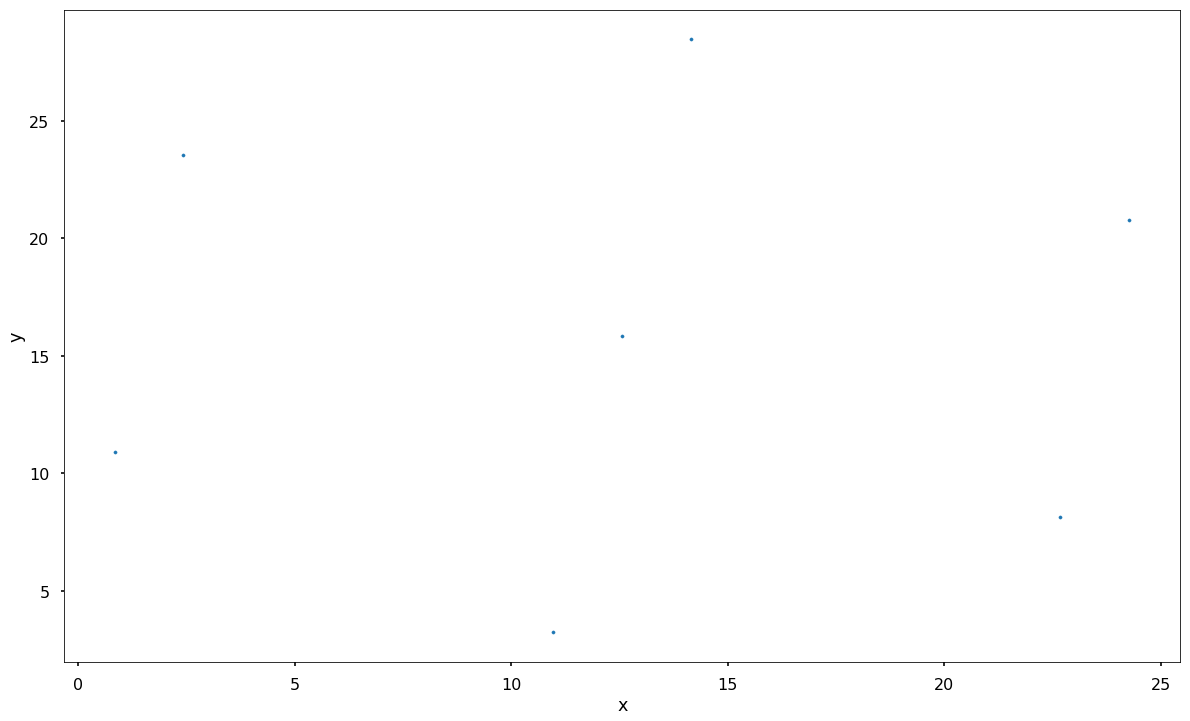

In [31]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [32]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [33]:
plot_region(x_bounds=(4.0, 4.2), y_bounds=(-0.5, -0.1))


ValueError: scatter requires x column to be numeric

In [38]:
thrones2vec.most_similar("😢")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('😍', 0.13169674575328827),
 ('😘', 0.12398727238178253),
 ('🤔', 0.12361938506364822),
 ('❤️', 0.1200336217880249),
 ('🙁', 0.1056119054555893),
 ('😳', 0.09390711784362793)]

In [35]:
len(thrones2vec.wv.vectors[0])

300

In [ ]:
thrones2vec.most_similar(positive=['🍆', '👅'], negative=['🐤'])

In [ ]:
type(thrones2vec.wv.vectors)

In [43]:
thrones2vec.wv.similarity('😘', '❤️')

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-1.0842022e-19

In [ ]:
thrones2vec.wv.similarity('💖', '💕')

In [ ]:
thrones2vec.wv.similarity('🍰', '🦓')

In [ ]:
thrones2vec.wv.similarity('😊', '😄')

In [ ]:
thrones2vec.wv.distance("😊", "🦓")